In [1]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

s = tf.InteractiveSession()

TensorFlow 1.x selected.


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/DL-HW1/Q1_train.csv')

In [4]:
#Getting the labels
labels = data.iloc[:,0]
data.drop(columns = ['label'],inplace = True)
#standarizing
data = data/255

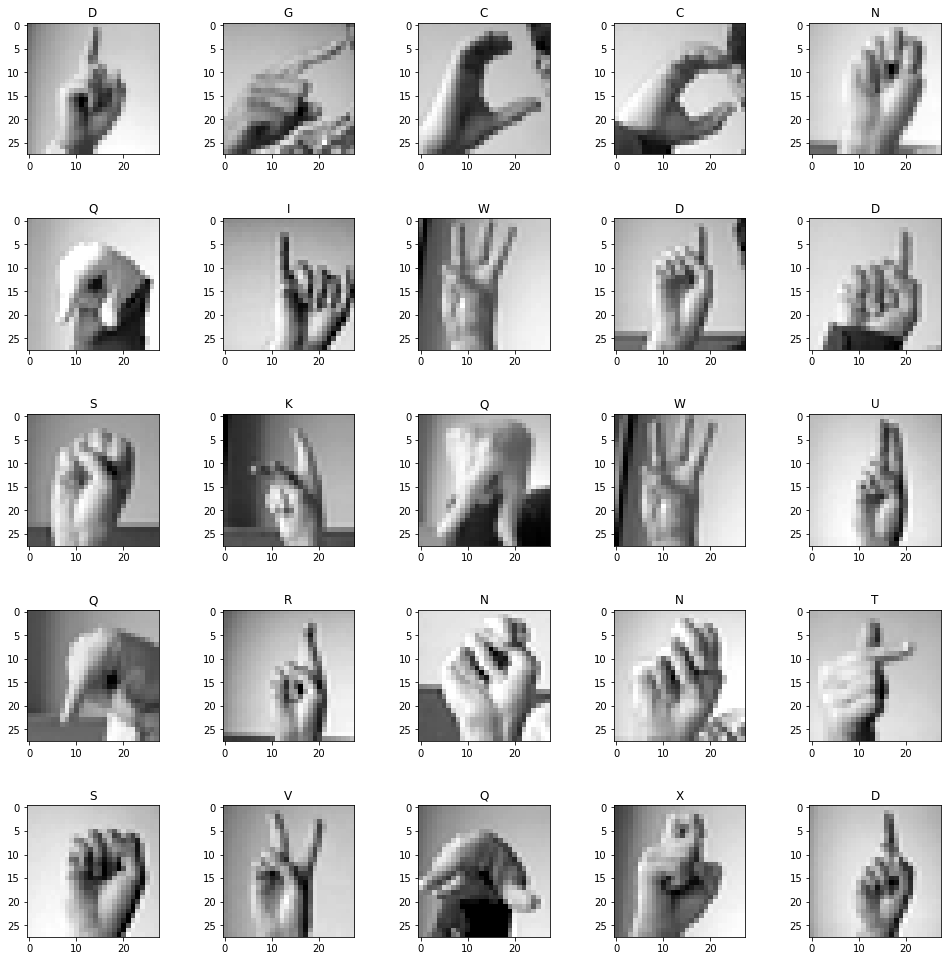

In [5]:
fig , ax = plt.subplots(nrows=5, ncols= 5, figsize = (14, 14))
ax = ax.flatten()
fig.tight_layout(pad=3.0)
for i, a in enumerate(ax):   
    a.imshow(data.values[i][:].reshape(28, 28), cmap = 'gray')
    a.set(title = string.ascii_letters[26+labels[i]])

In [6]:
#splitting the data
X_train, X_validation, y_train, y_validation = train_test_split(data, labels,test_size = 0.2, random_state = 123)
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_validation = lb.transform(y_validation)

In [7]:
num_classes = y_train.shape[1]
num_features = X_train.shape[1]
num_output = y_train.shape[1]
num_layers_0 = 512
num_layers_1 = 256
num_layers_2 = 128
starter_learning_rate = 0.0005
starter_learning_rate2 = 0.025

In [8]:
X_in = tf.placeholder('float32',shape =(None,num_features),name="X_in")
y_in = tf.placeholder('float32',shape = (None,num_classes),name='y_in')

In [9]:
# Weights initialized by random normal function with std_dev = sqrt(4/(number of input features+ number of output features)
weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(tf.sqrt(4/float(num_features + num_layers_0 )))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))
weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(tf.sqrt(4/float(num_layers_0 + num_layers_1)))))
bias_1 = tf.Variable(tf.random_normal([num_layers_1]))
weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_layers_2], stddev=(tf.sqrt(4/float(num_layers_1 + num_layers_2)))))
bias_2 = tf.Variable(tf.random_normal([num_layers_2]))
weights_3 = tf.Variable(tf.random_normal([num_layers_2,num_output], stddev=(1/tf.sqrt(float(num_layers_2)))))
bias_3 = tf.Variable(tf.random_normal([num_output]))

In [10]:
# Initializing weigths and biases
hidden_output_0 = tf.nn.relu(tf.matmul(X_in,weights_0)   +bias_0)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0,weights_1)  +bias_1)
hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1,weights_2) +bias_2)
y_pred = tf.sigmoid(tf.matmul(hidden_output_2,weights_3)+ bias_3)

In [11]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_pred,labels=y_in))
#learning rate of Dynamic type
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.95, staircase=True)
learning_rate2 = tf.train.exponential_decay(starter_learning_rate, 0, 4, 0.95, staircase=True)

In [12]:
# Adam optimzer for finding the right weight
optimizer_adam = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2, weights_3,
                                                                         bias_0,bias_1,bias_2, bias_3])
optimizer_sgd = tf.train.GradientDescentOptimizer(starter_learning_rate2).minimize(loss,var_list=[weights_0,weights_1,weights_2, weights_3,
                                                                         bias_0,bias_1,bias_2, bias_3])

In [13]:
correct_prediction = tf.equal(tf.argmax(y_train,1), tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
X_train, X_validation= X_train.values, X_validation.values

In [15]:
# Training parameters
batch_size = 64
epochs= 20
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
testing_loss = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer_adam, {X_in: X_train[arr[index:index+batch_size]][:],
                          y_in: y_train[arr[index:index+batch_size]][:]} )
    training_accuracy.append(s.run(accuracy, feed_dict= {X_in:X_train, 
                                                         y_in: y_train}))
    training_loss.append(s.run(loss, {X_in: X_train, 
                                      y_in: y_train}))
    
#Evaluate
    testing_accuracy.append(accuracy_score(y_validation.argmax(1), 
                            s.run(y_pred, {X_in: X_validation}).argmax(1)))
    testing_loss.append(s.run(loss, {X_in: X_validation, 
                                      y_in: y_validation}))
    print(f"Epoch:{epoch}, Train loss: {training_loss[epoch]:.2f} Train acc: {training_accuracy[epoch]:.3f}, Test acc:{testing_accuracy[epoch]:.3f}")

Epoch:0, Train loss: 2.61 Train acc: 0.437, Test acc:0.448
Epoch:1, Train loss: 2.50 Train acc: 0.525, Test acc:0.522
Epoch:2, Train loss: 2.42 Train acc: 0.681, Test acc:0.679
Epoch:3, Train loss: 2.38 Train acc: 0.712, Test acc:0.710
Epoch:4, Train loss: 2.37 Train acc: 0.752, Test acc:0.750
Epoch:5, Train loss: 2.35 Train acc: 0.759, Test acc:0.759
Epoch:6, Train loss: 2.33 Train acc: 0.789, Test acc:0.792
Epoch:7, Train loss: 2.31 Train acc: 0.848, Test acc:0.848
Epoch:8, Train loss: 2.32 Train acc: 0.825, Test acc:0.824
Epoch:9, Train loss: 2.29 Train acc: 0.873, Test acc:0.875
Epoch:10, Train loss: 2.30 Train acc: 0.877, Test acc:0.874
Epoch:11, Train loss: 2.30 Train acc: 0.867, Test acc:0.867
Epoch:12, Train loss: 2.30 Train acc: 0.893, Test acc:0.891
Epoch:13, Train loss: 2.28 Train acc: 0.917, Test acc:0.919
Epoch:14, Train loss: 2.32 Train acc: 0.829, Test acc:0.830
Epoch:15, Train loss: 2.29 Train acc: 0.896, Test acc:0.894
Epoch:16, Train loss: 2.28 Train acc: 0.931, Test 

# Note on accuaracy of model
> take into account that accuracy of model(train and test) in adam optimizer can go up to 0.93 depending on the random state we are in and in different running and is varaiable between 0.78 and 0.93 


Train Accuracy: 0.93
Test Accuracy:0.92
Train Loss: 2.28
Test Loss:2.28


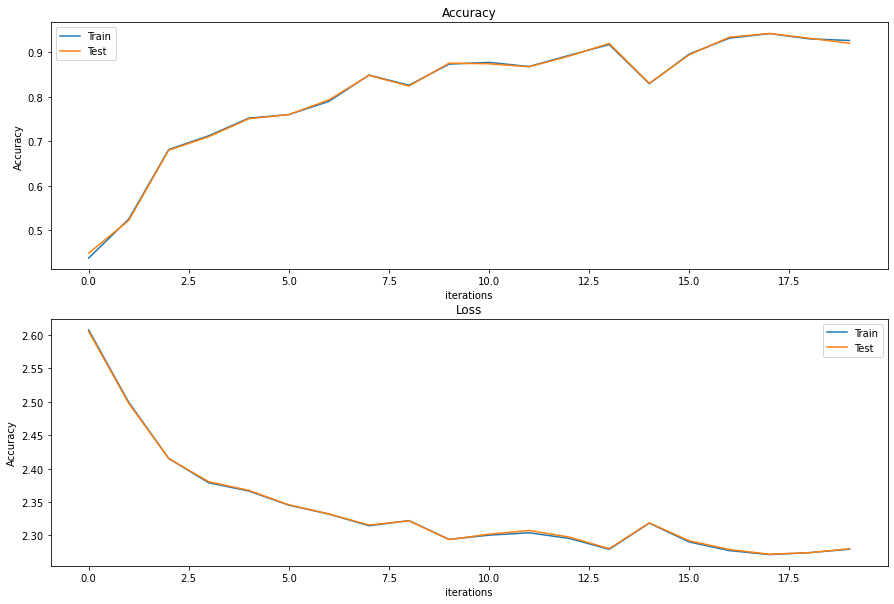

In [16]:
iterations = list(range(epochs))
fig, ax = plt.subplots(nrows = 2, ncols=1,figsize = (15, 10))
ax[0].plot(iterations, training_accuracy, label='Train')
ax[0].plot(iterations, testing_accuracy, label='Test')
ax[0].set(title = 'Accuracy',
       ylabel= ('Accuracy'), 
       xlabel = ('iterations'))
ax[0].legend()
ax[1].plot(iterations, training_loss, label='Train')
ax[1].plot(iterations, testing_loss, label='Test')
ax[1].set(title = 'Loss',
       ylabel= ('Accuracy'), 
       xlabel = ('iterations'))
ax[1].legend()
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))
print("Train Loss: {0:.2f}".format(training_loss[-1]))
print("Test Loss:{0:.2f}".format(testing_loss[-1]))

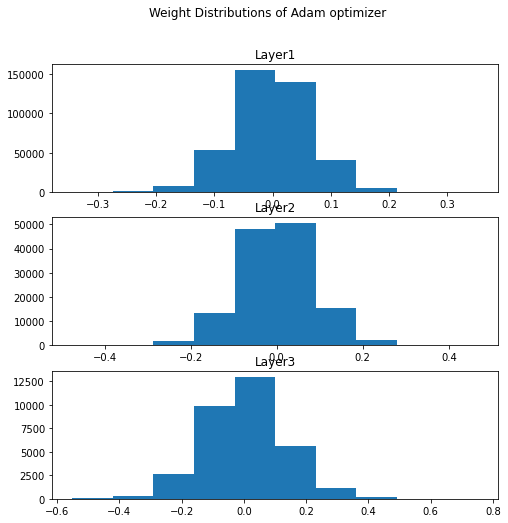

In [17]:
fig, ax = plt.subplots(nrows = 3, ncols=1,figsize = (8, 8))
for i, a in enumerate(ax):   
    if i==0:
      a.hist(s.run(weights_0).reshape(-1,1), bins = 10)
    elif i==1:
      a.hist(s.run(weights_1).reshape(-1,1), bins = 10)
    else : 
      a.hist(s.run(weights_2).reshape(-1,1), bins = 10)
    a.set(title = 'Layer' + str(i+1))
fig.suptitle('Weight Distributions of Adam optimizer');

In [18]:
# Training parameters
X_train = X_train + (0.35)*np.random.randn(X_train.shape[0],X_train.shape[1])
batch_size = 128
epochs=250
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
testing_loss = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
       s.run(optimizer_sgd, {X_in: X_train[arr[index:index+batch_size]][:],
                          y_in: y_train[arr[index:index+batch_size]][:]} )
    training_accuracy.append(s.run(accuracy, feed_dict= {X_in:X_train, 
                                                         y_in: y_train}))
    training_loss.append(s.run(loss, {X_in: X_train, 
                                      y_in: y_train}))
    
#Evaluate
    testing_accuracy.append(accuracy_score(y_validation.argmax(1), 
                            s.run(y_pred, {X_in: X_validation}).argmax(1)))
    testing_loss.append(s.run(loss, {X_in: X_validation, 
                                      y_in: y_validation}))
    if epoch%10 == 0:
      print(f"Epoch:{epoch}, Train loss: {training_loss[epoch]:.2f} Train acc: {training_accuracy[epoch]:.3f}, Test acc:{testing_accuracy[epoch]:.3f}")

Epoch:0, Train loss: 3.12 Train acc: 0.044, Test acc:0.043
Epoch:10, Train loss: 2.68 Train acc: 0.347, Test acc:0.419
Epoch:20, Train loss: 2.60 Train acc: 0.414, Test acc:0.503
Epoch:30, Train loss: 2.55 Train acc: 0.453, Test acc:0.525
Epoch:40, Train loss: 2.52 Train acc: 0.466, Test acc:0.547
Epoch:50, Train loss: 2.50 Train acc: 0.499, Test acc:0.586
Epoch:60, Train loss: 2.47 Train acc: 0.531, Test acc:0.616
Epoch:70, Train loss: 2.46 Train acc: 0.551, Test acc:0.639
Epoch:80, Train loss: 2.44 Train acc: 0.571, Test acc:0.658
Epoch:90, Train loss: 2.43 Train acc: 0.595, Test acc:0.688
Epoch:100, Train loss: 2.43 Train acc: 0.586, Test acc:0.665
Epoch:110, Train loss: 2.41 Train acc: 0.614, Test acc:0.699
Epoch:120, Train loss: 2.40 Train acc: 0.628, Test acc:0.719
Epoch:130, Train loss: 2.40 Train acc: 0.631, Test acc:0.713
Epoch:140, Train loss: 2.38 Train acc: 0.650, Test acc:0.740
Epoch:150, Train loss: 2.38 Train acc: 0.658, Test acc:0.747
Epoch:160, Train loss: 2.38 Train a

Train Accuracy: 0.72
Test Accuracy:0.79
Train Loss: 2.34
Test Loss:2.37


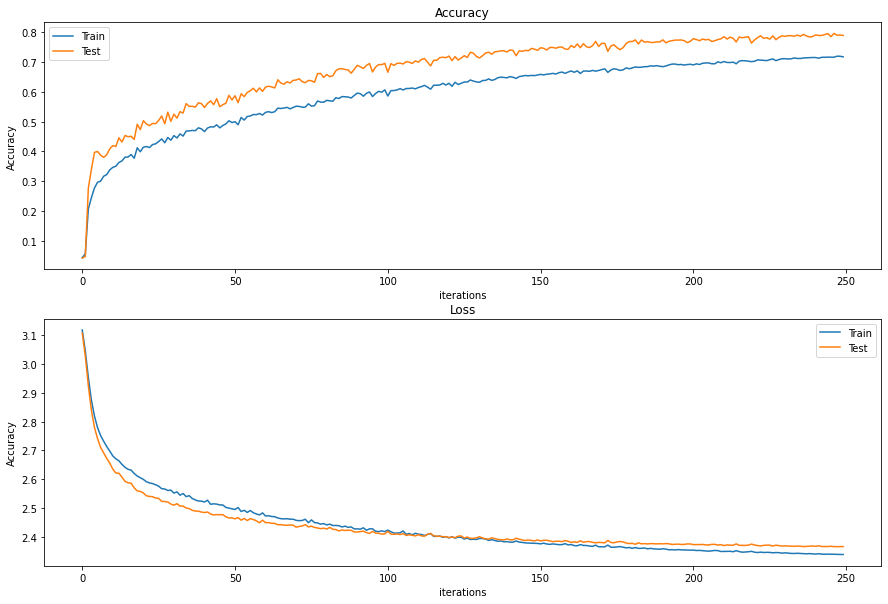

In [19]:
iterations = list(range(epochs))
fig, ax = plt.subplots(nrows = 2, ncols=1,figsize = (15, 10))
ax[0].plot(iterations, training_accuracy, label='Train')
ax[0].plot(iterations, testing_accuracy, label='Test')
ax[0].set(title = 'Accuracy',
       ylabel= ('Accuracy'), 
       xlabel = ('iterations'))
ax[0].legend()
ax[1].plot(iterations, training_loss, label='Train')
ax[1].plot(iterations, testing_loss, label='Test')
ax[1].set(title = 'Loss',
       ylabel= ('Accuracy'), 
       xlabel = ('iterations'))
ax[1].legend()
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))
print("Train Loss: {0:.2f}".format(training_loss[-1]))
print("Test Loss:{0:.2f}".format(testing_loss[-1]))

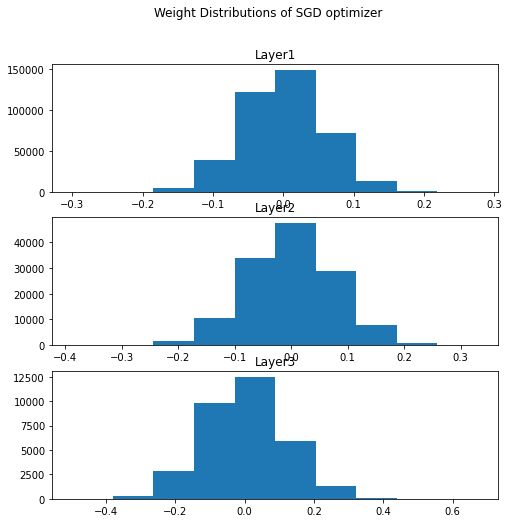

In [20]:
fig, ax = plt.subplots(nrows = 3, ncols=1,figsize = (8, 8))
for i, a in enumerate(ax):   
    if i==0:
      a.hist(s.run(weights_0).reshape(-1,1), bins = 10)
    elif i==1:
      a.hist(s.run(weights_1).reshape(-1,1), bins = 10)
    else : 
      a.hist(s.run(weights_2).reshape(-1,1), bins = 10)
    a.set(title = 'Layer' + str(i+1))
fig.suptitle('Weight Distributions of SGD optimizer');

In [22]:
#adding Dropout to the model
keep_prob = tf.placeholder(tf.float32)
hidden_output_0 = tf.nn.relu(tf.matmul(X_in,weights_0)   +bias_0)
hidden_output_00 = tf.nn.dropout(hidden_output_0, keep_prob)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_00,weights_1)  +bias_1)
hidden_output_11 = tf.nn.dropout(hidden_output_1, keep_prob)
hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_11,weights_2) +bias_2)
hidden_output_22 = tf.nn.dropout(hidden_output_2, keep_prob)
y_pred = tf.sigmoid(tf.matmul(hidden_output_22,weights_3)+ bias_3)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
batch_size = 64
epochs=19
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
testing_loss = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer_adam , {X_in: X_train[arr[index:index+batch_size]],
                          y_in: y_train[arr[index:index+batch_size]],
                        keep_prob:dropout_prob})
    training_accuracy.append(s.run(accuracy, feed_dict= {X_in:X_train, 
                                                         y_in: y_train,keep_prob:1}))
    training_loss.append(s.run(loss, {X_in: X_train, 
                                      y_in: y_train,keep_prob:1}))
    
    testing_loss.append(s.run(loss, {X_in: X_validation, 
                                      y_in: y_validation,keep_prob:1}))
    ## Evaluation of model
    testing_accuracy.append(accuracy_score(y_validation.argmax(1), 
                            s.run(y_pred, {X_in: X_validation,keep_prob:1}).argmax(1)))
    print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}, Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                   testing_accuracy[epoch]))

Epoch:0, Train loss: 2.67 Train acc: 0.328, Test acc:0.330
Epoch:1, Train loss: 2.58 Train acc: 0.405, Test acc:0.435
Epoch:2, Train loss: 2.53 Train acc: 0.447, Test acc:0.502
Epoch:3, Train loss: 2.50 Train acc: 0.515, Test acc:0.603
Epoch:4, Train loss: 2.52 Train acc: 0.518, Test acc:0.596
Epoch:5, Train loss: 2.47 Train acc: 0.562, Test acc:0.633
Epoch:6, Train loss: 2.43 Train acc: 0.627, Test acc:0.699
Epoch:7, Train loss: 2.42 Train acc: 0.638, Test acc:0.705
Epoch:8, Train loss: 2.40 Train acc: 0.666, Test acc:0.725
Epoch:9, Train loss: 2.39 Train acc: 0.686, Test acc:0.758
Epoch:10, Train loss: 2.39 Train acc: 0.689, Test acc:0.770
Epoch:11, Train loss: 2.37 Train acc: 0.717, Test acc:0.780
Epoch:12, Train loss: 2.39 Train acc: 0.705, Test acc:0.783
Epoch:13, Train loss: 2.36 Train acc: 0.735, Test acc:0.797
Epoch:14, Train loss: 2.37 Train acc: 0.715, Test acc:0.770
Epoch:15, Train loss: 2.35 Train acc: 0.756, Test acc:0.824
Epoch:16, Train loss: 2.36 Train acc: 0.745, Test 